<a href="https://colab.research.google.com/github/necmigunduz/train_linear_model/blob/main/train_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt

### Create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cpu


In [19]:
### 1- Data - Linear regression
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = bias + weight * X

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

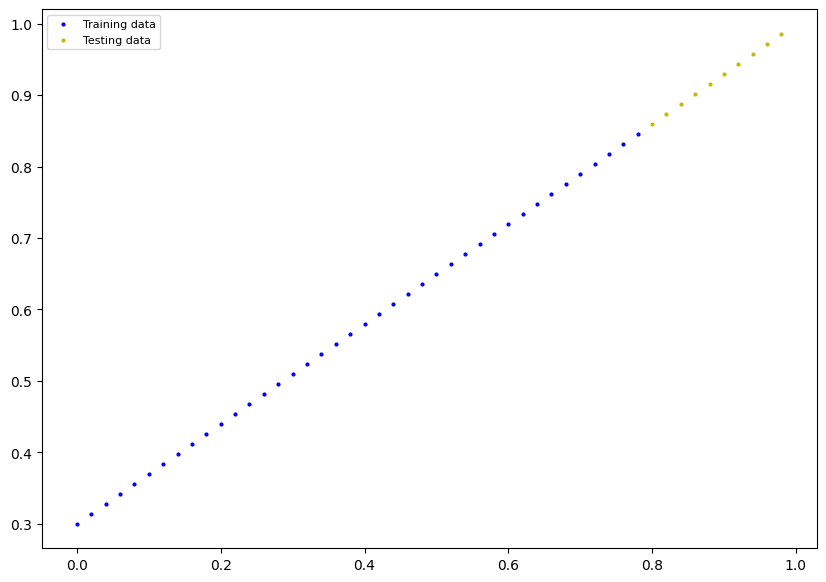

In [20]:
### 2- Plot
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 8})
plot_predictions()

In [21]:
### 3- Build a linear model
class LinearPrediction (nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [22]:
### 4- Predictions
torch.manual_seed(42)
model_1 = LinearPrediction()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [23]:
# Check the device
next(model_1.parameters()).device

device(type='cpu')

In [24]:
# Set the model to the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [30]:
### 5- Training
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)  # lr = learning rate

# Training loop
torch.manual_seed(42)
epochs = 200
# Device agnostic code for data
if torch.cuda.is_available():
  X_train = X_train.to(device)
  X_test = X_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_preds = model_1(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930